In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras import models,layers
import pandas as pd

In [5]:
tf.test.is_gpu_available()

True

In [6]:
path=r"G:\dataset\cifar-10"

In [7]:
lable=pd.read_csv(path+"\\"+"trainLabels.csv")
keys=lable.keys()

In [8]:
data=[]
for i in lable['id']:
    temp=cv2.imread(path+"\\train\\"+str(i)+".png")
    data.append(temp)
data=np.array(data)
data.shape

(50000, 32, 32, 3)

In [9]:
categoris=list(set(lable[keys[1]]))
categoris

['airplane',
 'cat',
 'bird',
 'horse',
 'deer',
 'truck',
 'dog',
 'automobile',
 'ship',
 'frog']

In [10]:
for i in range(len(lable)):
    for j in range(10):
        if lable[keys[1]][i]==categoris[j]:
            lable[keys[1]][i]=j

ipykernel_launcher:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [11]:
trainData=data/255
trainLabels=np.array(lable[keys[1]],dtype=int)
trainLabels.reshape(len(trainLabels),1)

array([[9],
       [5],
       [5],
       ...,
       [5],
       [7],
       [7]])

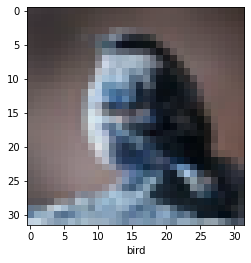

In [8]:
def checkData(i):
    plt.imshow(data[i])
    plt.xlabel(categoris[trainLabels[i]])
checkData(1110)


In [12]:
input_shape=(32,32,3)
output_size=10
hidden1=64
hidden2=32

In [13]:
model = models.Sequential()

#filter
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#ann
model.add(layers.Flatten())
model.add(layers.Dense(hidden1, activation='relu'))
#model.add(layers.Dense(hidden2, activation='relu'))
model.add(layers.Dense(output_size, activation='softmax'))

model.compile(loss= tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'], optimizer='adam')
model.fit(trainData, trainLabels, batch_size=128, epochs=5, verbose=2)
model.save(path+"\\trained.h5")

# model= md.load_model(path+"\\trained.h5")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 50000 samples
Epoch 1/10
50000/50000 - 19s - loss: 1.6172 - acc: 0.4193
Epoch 2/10
50000/50000 - 19s - loss: 1.2633 - acc: 0.5548
Epoch 3/10
50000/50000 - 20s - loss: 1.1230 - acc: 0.6069
Epoch 4/10
50000/50000 - 20s - loss: 1.0319 - acc: 0.6397
Epoch 5/10
50000/50000 - 20s - loss: 0.9598 - acc: 0.6647
Epoch 6/10
50000/50000 - 19s - loss: 0.9044 - acc: 0.6866
Epoch 7/10
50000/50000 - 18s - loss: 0.8601 - acc: 0.7015
Epoch 8/10
50000/50000 - 20s - loss: 0.8227 - acc: 0.7163
Epoch 9/10
50000/50000 - 20s - loss: 0.7865 - acc: 0.7277
Epoch 10/10
50000/50000 - 19s - loss: 0.7485 - acc: 0.7413
